C:\Users\niyat\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  app.launch_new_instance()
C:\Users\niyat\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


predicted=30010.987548, expected=36142.000000
predicted=29438.463908, expected=21670.000000
predicted=32452.317648, expected=30017.000000
predicted=26737.095334, expected=50175.000000
predicted=33855.160072, expected=32833.000000
predicted=31200.250907, expected=3486.000000
predicted=23387.187466, expected=23640.000000
predicted=34725.603114, expected=15839.000000
predicted=35135.820518, expected=30368.000000
predicted=29697.799434, expected=15484.000000
predicted=31383.611052, expected=29322.000000
predicted=28719.954088, expected=33343.000000
predicted=34944.464610, expected=21100.000000
predicted=27727.534982, expected=55211.000000
predicted=30714.192678, expected=53157.000000
predicted=35267.218586, expected=64017.000000
predicted=30870.544691, expected=52712.000000
predicted=30573.369694, expected=53887.000000
predicted=30964.801913, expected=51242.000000
predicted=36538.019685, expected=53711.000000
predicted=33517.845563, expected=24971.000000
predicted=28557.103697, expected=75

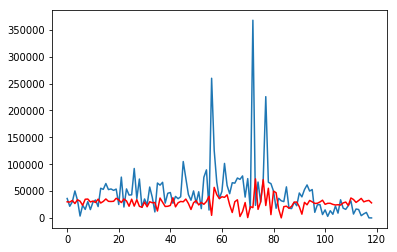

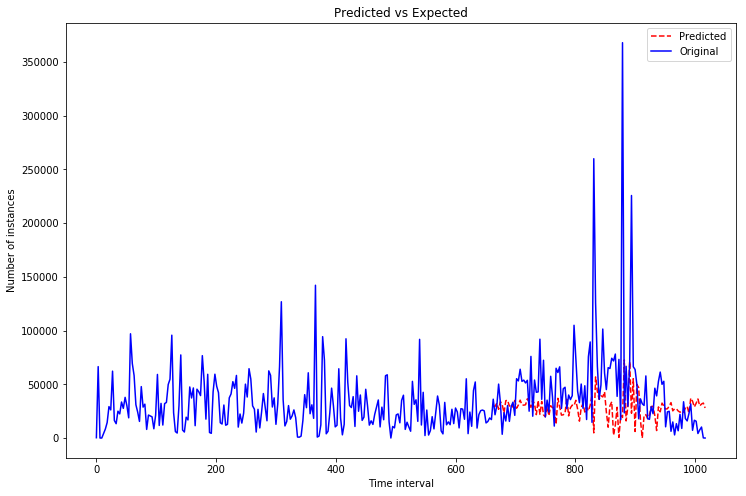

In [3]:
#AR MODEL 
#referred from "https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/"
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt
import time


df2=pd.read_csv('final_input_file.csv')
X = df2['no_of_instances'].values
time1=df2['time_interval'].values
time_start = time.clock()
# split dataset
#X = series.values
train, test = X[1:len(X)-119], X[len(X)-119:]

# train autoregression
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()

for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    
    if(yhat<0):
        predictions.append(test[t])
    else:
        predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    
time2=list()
for i in range(len(time1)-119,len(time1)):
    time2.append(time1[i])    


sumAPE=0
for i in range(len(predictions)):
    
    APE=0
    APE=abs((test[i]-predictions[i])/test[i])
    sumAPE=sumAPE+APE
#print(test)
#print(predictions)
MAPE=sumAPE/150
print('MAPE',MAPE*100)
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

#computation time
time_elapsed = (time.clock() - time_start)
print('time_elapsed', time_elapsed)



plt.plot(test)
plt.plot(predictions, color='red')
plt.show()


fig=plt.figure(figsize=(12,8))
plt.title("Predicted vs Expected")
plt.xlabel("Time interval")
plt.ylabel("Number of instances")
plt.plot(time2, predictions, color='red', label='Predicted',linestyle='dashed')


plt.plot(df2.time_interval, df2.no_of_instances, color='blue', label='Original',linestyle='solid')
plt.legend()
plt.show()

